In [1]:
#Import required libraries
import pandas as pd
import json
import requests

In [125]:
api_url="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/module%201/Accessing%20Data%20Using%20APIs/jobs.json?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2021-01-01"
r = requests.get(api_url)
header = r.headers
print(r.headers)
data = r.json()
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

{'Date': 'Fri, 03 Jun 2022 19:39:13 GMT', 'X-Clv-Request-Id': '75e7b10a-03b9-4bfb-9994-7021ec8ea9c9', 'Server': 'Cleversafe', 'X-Clv-S3-Version': '2.5', 'Accept-Ranges': 'bytes', 'x-amz-request-id': '75e7b10a-03b9-4bfb-9994-7021ec8ea9c9', 'x-amz-mp-parts-count': '2', 'Cache-Control': 'max-age=0,public', 'ETag': '"444164853f0b0dc867ee9cbec13ef254-2"', 'Content-Type': 'application/json', 'Last-Modified': 'Fri, 03 Jun 2022 10:46:07 GMT', 'Content-Length': '12878382'}


In [31]:
df = pd.DataFrame(data)
df.head()

,Id,Job Title,Job Experience Required,Key Skills,Role Category,Location,Functional Area,Industry,Role
0,0,Digital Media Planner,5 - 10 yrs,Media Planning| Digital Media,Advertising,Los Angeles,"Marketing , Advertising , MR , PR , Media Plan...","Advertising, PR, MR, Event Management",Media Planning Executive/Manager
1,1,Online Bidding Executive,2 - 5 yrs,pre sales| closing| software knowledge| client...,Retail Sales,New York,"Sales , Retail , Business Development","IT-Software, Software Services",Sales Executive/Officer
2,2,Trainee Research/ Research Executive- Hi- Tech...,0 - 1 yrs,Computer science| Fabrication| Quality check| ...,R&D,San Francisco,"Engineering Design , R&D","Recruitment, Staffing",R&D Executive
3,3,Technical Support,0 - 5 yrs,Technical Support,Admin/Maintenance/Security/Datawarehousing,Washington DC,"IT Software - Application Programming , Mainte...","IT-Software, Software Services",Technical Support Engineer
4,4,Software Test Engineer -hyderabad,2 - 5 yrs,manual testing| test engineering| test cases| ...,Programming & Design,Boston,IT Software - QA & Testing,"IT-Software, Software Services",Testing Engineer


In [32]:
df.describe()

,Id
count,27005.000000
mean,14973.294316
std,8661.945426
min,0.000000
25%,7474.000000
50%,14913.000000
75%,22477.000000
max,29999.000000


In [112]:
df2 = df['Job Title'].value_counts()
df2.to_excel(r"C:\Users\wbouley\Desktop\Portfolio\Coursera\IBM Data Analysis Professional Certificate\Capstone\week 1"+ '/collectingJobs.xlsx')

In [113]:
df2.head()
df2 = pd.DataFrame(df2)
df2.head()
df2.rename(columns={'': 'Job Title', 'Job Title': '# of Job Listings'},inplace=True)

In [114]:
df2.head()


,# of Job Listings
Sales Executive,119
PHP Developer,117
Business Development Executive,117
Business Development Manager,98
Java Developer,80


In [115]:
df2.reset_index(inplace=True)
df2.rename(index={0: 'index'}, inplace=True)
df2.head()

,index,# of Job Listings
index,Sales Executive,119
1,PHP Developer,117
2,Business Development Executive,117
3,Business Development Manager,98
4,Java Developer,80


In [116]:
df2.rename(columns={'index': 'Job Title'}, inplace=True)

In [117]:
df2.head()

,Job Title,# of Job Listings
index,Sales Executive,119
1,PHP Developer,117
2,Business Development Executive,117
3,Business Development Manager,98
4,Java Developer,80


In [123]:
df2.dtypes

Job Title            object
# of Job Listings     int64
dtype: object

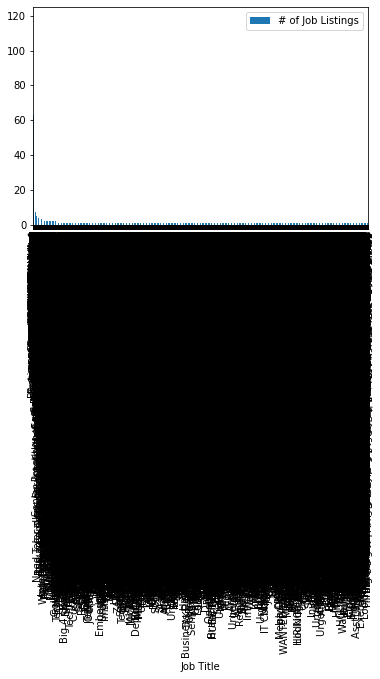

In [126]:
df2.plot(kind='bar', x='Job Title', y='# of Job Listings')
plt.show()

In [20]:
def get_number_of_jobs_T(job):
    number_of_jobs = 0
    #your code goes here
    page=1
    new_results=1
    while new_results>0:
        payload={"description":job,"page":page}
        r=requests.get(api_url,payload)
        new_results =len(r.json())
        page+=1
        number_of_jobs+=(len(r.json()))
    #your code goes here
    return job,number_of_jobs

In [47]:
df[df['Location'] == 'Washington DC']

,Id,Job Title,Job Experience Required,Key Skills,Role Category,Location,Functional Area,Industry,Role
3,3,Python,0 - 5 yrs,Technical Support,Admin/Maintenance/Security/Datawarehousing,Washington DC,"IT Software - Application Programming , Mainte...","IT-Software, Software Services",Technical Support Engineer
13,13,Python,3 - 7 Years,Oracle IDAM|OIM|OAM,Programming & Design,Washington DC,"IT Software - Application Programming , Mainte...",IT-Software / Software Services,Software Developer
14,14,Python,2 - 4 yrs,digital marketing| seo| social media marketing...,Online/Digital Marketing,Washington DC,"Marketing , Advertising , MR , PR , Media Plan...","Advertising, PR, MR, Event Management",Social Media Marketing Manager
15,16,Python,2 - 7 yrs,Help Desk| Customer Service| customer relation...,Engineering Design,Washington DC,"Engineering Design , R&D","Industrial Products, Heavy Machinery",Senior Design Engineer
16,17,Python,3 - 7 yrs,Report Generation| Policies| analytical| proce...,Accounts,Washington DC,"Accounts , Finance , Tax , Company Secretary ,...","IT-Software, Software Services",Accounts Manager
...,...,...,...,...,...,...,...,...,...
19989,22185,Python,2 - 6 yrs,inside sales| team leading| Relationship Manag...,Pre Sales,Washington DC,"Sales , Retail , Business Development","Banking, Financial Services, Broking",Pre Sales Consultant
19990,22186,Python,0 - 5 yrs,upselling| Inbound Sales| csr| International C...,Voice,Washington DC,"ITES , BPO , KPO , LPO , Customer Service , Op...","BPO, Call Centre, ITeS",Associate/Senior Associate -(NonTechnical)
19991,22187,Python,2 - 3 yrs,Sales Executive Activities| Selling| MS Office...,Production/Manufacturing/Maintenance,Washington DC,"Production , Manufacturing , Maintenance","Industrial Products, Heavy Machinery",Industrial Engineer
19992,22188,Python,3 - 5 yrs,Photoshop| Illustrator| Design| AutoCAD| 3D| A...,Engineering Design,Washington DC,"Engineering Design , R&D","Advertising, PR, MR, Event Management",Design Engineer


In [48]:
import xlsxwriter

In [49]:
excel_file_path = r'C:\Users\wbouley\Desktop\Portfolio\Coursera\IBM Data Analysis Professional Certificate\Capstone\week 1/Jobs_API.xlsx'
writer = pd.ExcelWriter(excel_file_path, engine='xlsxwriter')
df.to_excel(writer, index=False, sheet_name='Jobs_API')
writer.save()

In [50]:
df2 = df.groupby(['Location']).count()
df2

,Id,Job Title,Job Experience Required,Key Skills,Role Category,Functional Area,Industry,Role
Location,,,,,,,,
Austin,434,434,434,434,434,434,434,434
Baltimore,1263,1263,1263,1263,1263,1263,1263,1263
Boston,2966,2966,2966,2966,2966,2966,2966,2966
Dallas,1208,1208,1208,1208,1208,1208,1208,1208
Detroit,3945,3945,3945,3945,3945,3945,3945,3945
Houston,3339,3339,3339,3339,3339,3339,3339,3339
Los Angeles,640,640,640,640,640,640,640,640
New Orleons,817,817,817,817,817,817,817,817
New York,3226,3226,3226,3226,3226,3226,3226,3226
